# Вторая лабараторная работа

#### _Корязин Егор 20-ИВТ-3_
#### 8 вариант (Астронавты)
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
astronaut_df = pd.read_csv("astronauts.csv", sep = ',')
astronaut_df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


# Задание 1. 
### Определить астронавта из США, который провел наибольшее количество времени в открытом космосе, построить график, на котором по оси ОХ отображены астронавты, а по оси ОY - время, которое они провели в открытом космосе.

In [10]:
top_budget_movie = astronaut_df.nlargest(1, columns=["Space Flight (hr)"])
top_budget_movie

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
346,Jeffrey N. Williams,1996.0,16.0,Active,1/18/1958,"Superior, WI",Male,US Military Academy; US Naval Postgraduate Sch...,Applied Science & Engineering,Aeronautical Engineering; National Security & ...,Colonel,US Army (Retired),4,12818,5,32.0,"STS-101 (Atlantis), ISS-13 (Soyuz), ISS-21/22 ...",NaN,NaN


<BarContainer object of 357 artists>

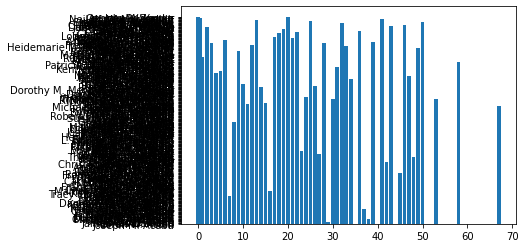

In [4]:
plt.bar(astronaut_df["Space Walks (hr)"], astronaut_df["Name"])

<AxesSubplot:xlabel='Name'>

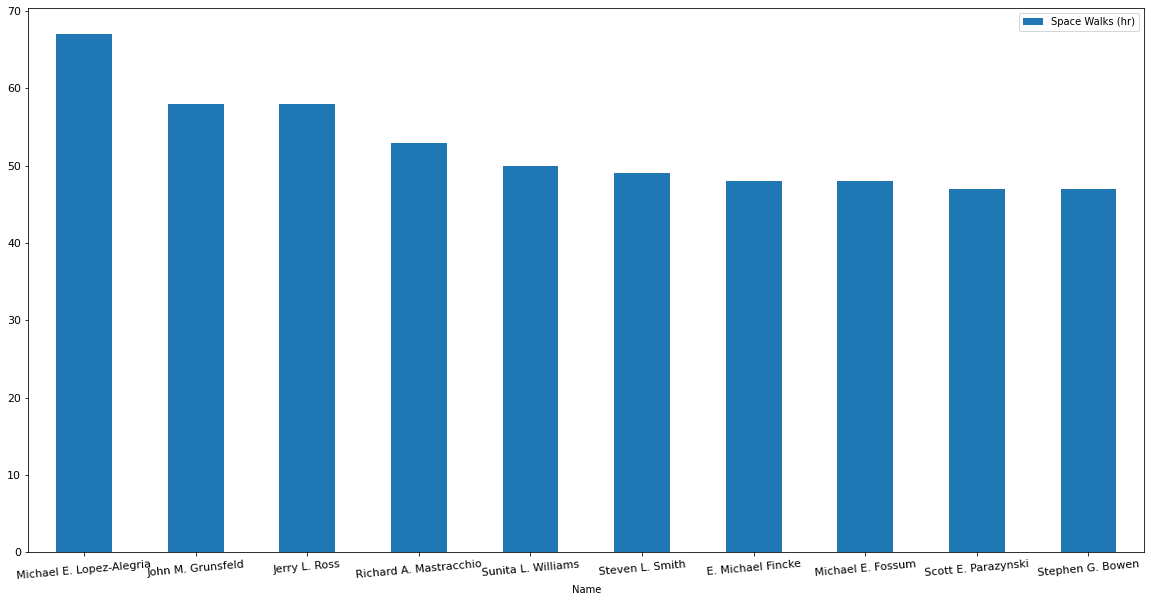

In [5]:
top_space_walks = astronaut_df.sort_values(by="Space Walks (hr)", ascending=False)
top_space_walks = top_space_walks[0:10]
top_space_walks.plot(x="Name", y="Space Walks (hr)", kind="bar", rot=5, fontsize=11, figsize=(20, 10))

In [6]:
print("Астронавт, который провел наибольшее количество времени в открытом космосе:", top_space_walks.iloc[0]['Name'])
print("Время в открытом космосе:", top_space_walks.iloc[0]["Space Walks (hr)"], "часов")

Астронавт, который провел наибольшее количество времени в открытом космосе: Michael E. Lopez-Alegria
Время в открытом космосе: 67.0 часов


# Задание 2. 
### Указать университет, выпустивший наибольшее количество астронавтов, построить график, на котором по оси ОХ отображены университеты, а по оси ОY - количество астронавтов, которые учились в данном университете

In [7]:
rating_university = {}

for i in range(len(astronaut_df)):
    if pd.isna(astronaut_df.iloc[i]["Alma Mater"]):
        continue
    
    university_one_person = astronaut_df.iloc[i]["Alma Mater"].split("; ")
    
    for j in range(len(university_one_person)):
        if university_one_person[j] in rating_university:
            rating_university[university_one_person[j]] += 1
        else:
            rating_university[university_one_person[j]] = 1
    

In [8]:
sorted_rating_university = sorted(rating_university.items(), key=lambda rating_university: rating_university[1])

In [9]:
top = 7

top_university = []
rating_top_university = []

len_university = len(sorted_rating_university)

for i in range(len_university - top, len_university):
    top_university.append(sorted_rating_university[i][0])
    rating_top_university.append(sorted_rating_university[i][1])

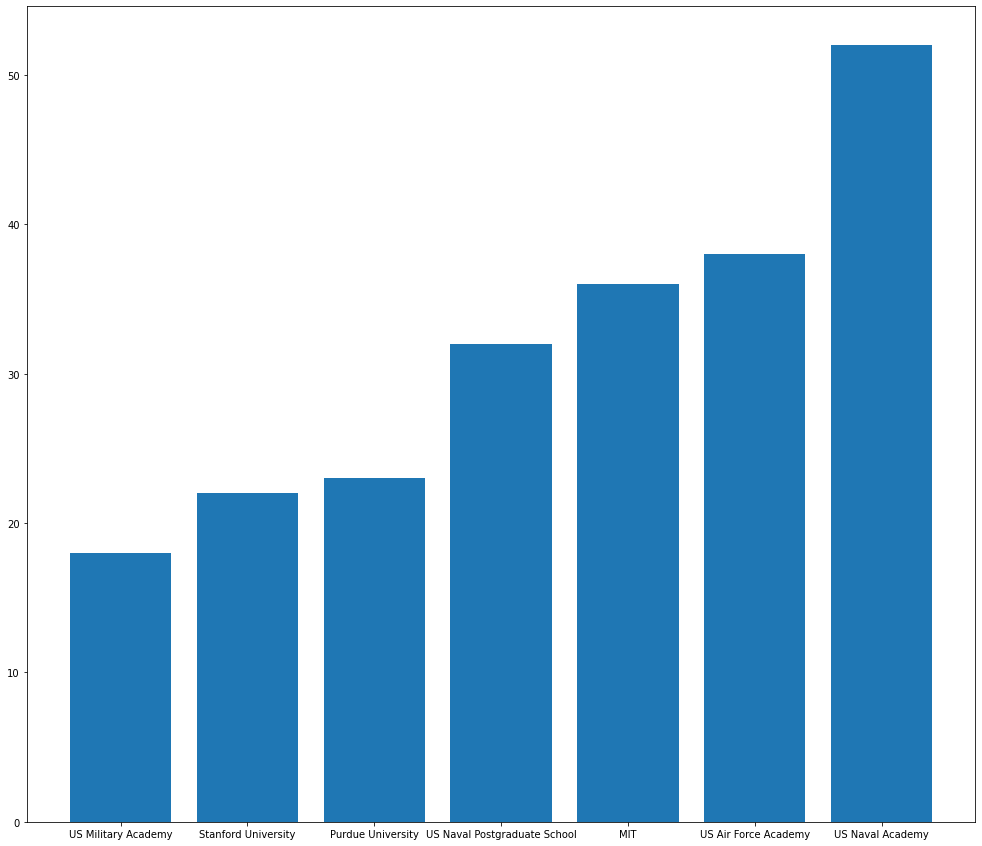

In [10]:
fig, ax = plt.subplots()

ax.bar(top_university, rating_top_university)

fig.set_figwidth(17)   
fig.set_figheight(15)    

plt.show()

In [11]:
best_university = sorted_rating_university[len_university - 1][0]
count_astronauts = sorted_rating_university[len_university - 1][1]

In [12]:
print("Университет, выпустивший наибольшее количество астронавтов", best_university)
print("Количество выпущенных астронавтотв:", count_astronauts)

Университет, выпустивший наибольшее количество астронавтов US Naval Academy
Количество выпущенных астронавтотв: 52


# Задание 3. 
### Определить количество военных и гражданских астронавтов

In [13]:
count_military = astronaut_df["Military Rank"].value_counts().sum()
count_civilian = len(astronaut_df) - count_military

In [14]:
print("Количество военных астронавтов:", count_military)
print("Количество гражданских астронавтов:", count_civilian)

Количество военных астронавтов: 207
Количество гражданских астронавтов: 150


# Задание 4. 
### Определить наиболее часто встречающееся среди астронавтов военное звание

In [15]:
popular_rank = astronaut_df["Military Rank"].value_counts().keys().tolist()[0]
count_popular_rank = astronaut_df["Military Rank"].value_counts()[0]

In [17]:
print("Наиболее часто встречающееся военное звание среди астронавтов:", popular_rank, 
      "его имеют:", count_popular_rank, "астронавтов")

Наиболее часто встречающееся военное звание среди астронавтов: Colonel его имеют: 94 астронавтов


# Задание 5. 
### Определить количество женщин среди астронавтов

In [18]:
count_female = len(astronaut_df[astronaut_df.Gender == "Female"])

In [19]:
print("Количетсво женщин среди астронавтов:", count_female)

Количетсво женщин среди астронавтов: 50


# Задание 6. 
### Удалить из набора данных астронавтов, для которых не указан бакалавриат. Выведите размер набора данных до и после удаления

In [20]:
start_size = len(astronaut_df)

astronaut_df_copy = astronaut_df.copy()
astronaut_df_copy = astronaut_df_copy.dropna(subset=['Undergraduate Major'])

end_size = len(astronaut_df_copy)

In [21]:
print("Изначальный размер набора:", start_size)
print("Размер набора после удаления:", end_size)
print("Разница =",(start_size - end_size))

Изначальный размер набора: 357
Размер набора после удаления: 335
Разница = 22


# Задание 7. 
### Определить количество астронавтов, родом из Техаса

In [22]:
astronaut_df_copy = astronaut_df.copy()
count = len(astronaut_df_copy[astronaut_df_copy['Birth Place'].apply(lambda x : x[-2:]) == "TX"])   

In [23]:
print("Количество астронавтов, родом из Техаса:", count)

Количество астронавтов, родом из Техаса: 23


# Задание 8. 
### Определить количество миссий, в ходе выполнения которых погибли астронавты

In [24]:
null_element = astronaut_df["Death Mission"].isnull().sum()

count = len(astronaut_df) - null_element

In [25]:
print("Количество миссий, в ходе выполнения которых погибли астронавты:", count)

Количество миссий, в ходе выполнения которых погибли астронавты: 16


# Задание 9. 
### Вычислить корреляцию Пирсона и Спирмена между признаками Gender и Missions. Сравнить полученные величины корреляции. Построить гистограммы для указанных признаков. Оценить значение p-value.


In [70]:
astronaut_df = astronaut_df.dropna(subset=['Missions'])

ast_copy = astronaut_df.copy()

List_Count_Mission = []

for i in range(len(test)):
    List_Count_Mission.append(len(ast_copy.iloc[i]["Missions"].split(", ")))
    
ast_copy["Count_Missions"] = List_Count_Mission

List_Bool_Gender = []

for i in range(len(test)):
    if test.iloc[i]["Gender"] == "Male":
        List_Bool_Gender.append(1)
    elif test.iloc[i]["Gender"] == "Female":
        List_Bool_Gender.append(0)
    else:
        print("Error Gender:", ast_copy.iloc[i]["Gender"])

ast_copy["Bool_Gender"] = List_Bool_Gender

In [72]:
spearman = test['Bool_Gender'].corr(test['Count_Missions'], method="spearman")
pearson = test['Bool_Gender'].corr(test['Count_Missions'], method="pearson")

In [73]:
print("Корреляция между Gender и Missoins равна:")
print("Методом Пирсона: ", pearson)
print('Методом Спирмена:', spearman)

if (pearson > spearman):
    print("Число Пирсона больше числа Спирмена")
elif (pearson < spearman):
    print("Число Спирмена больше числа Пирсона")
else:
    print("Число Спирмена и число Пирсона одинакова")
    
print("Разница:", abs(pearson - spearman))

Корреляция между Gender и Missoins равна:
Методом Пирсона:  -0.0227979696243931
Методом Спирмена: -0.02411924245940919
Число Пирсона больше числа Спирмена
Разница: 0.0013212728350160893


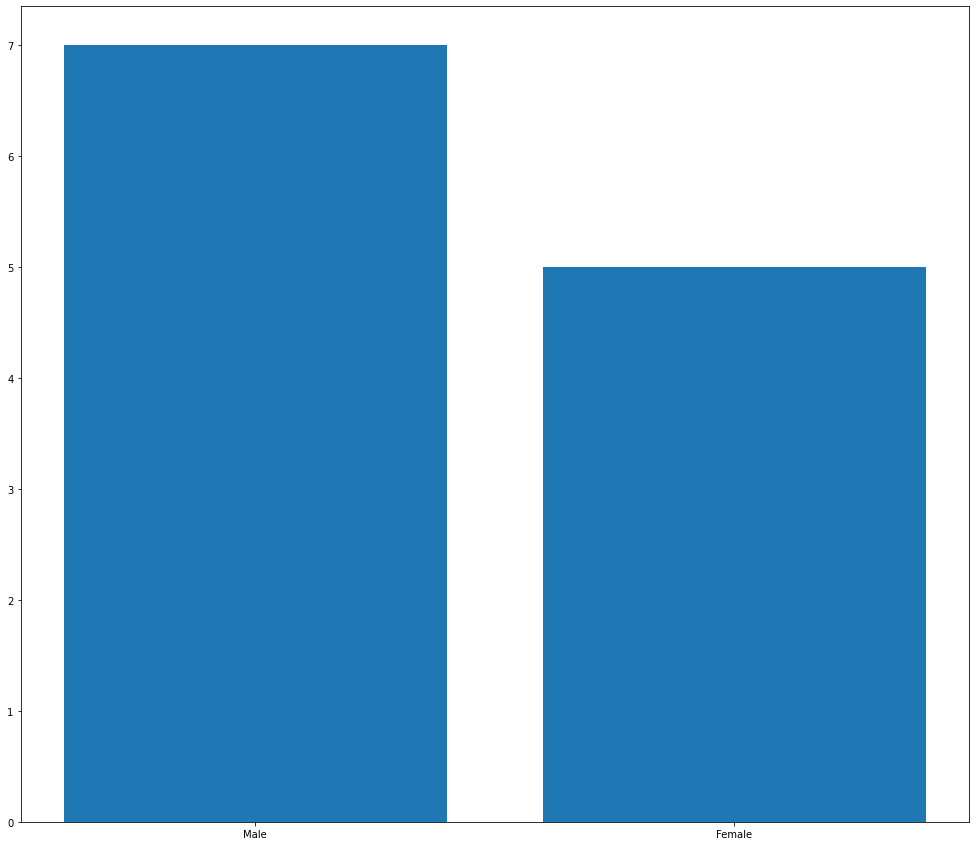

In [75]:
fig, ax = plt.subplots()

ax.bar(ast_copy["Gender"], ast_copy["Count_Missions"])

fig.set_figwidth(17)   
fig.set_figheight(15)    

plt.show()